In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec


In [100]:
"""
Make a function that will provide this for both gsm_
 and arithmetic

1. Pick num agents = 2 or 3 and plot with increasing rounds
2. Pick agents = 3 and plot with increasing rounds.
--- For these plots, add the standard deviation

3. Report the results in a table view
"""
gsmdata  = pd.read_csv("gsm_experiment/gsm_experiment_data.csv", index_col=False).drop(3)
mathdata = pd.read_csv("math/experiment_data_arithmetic.csv", index_col=False)
agreement_mathdata = pd.read_csv("math/agreement_data_arithmetic.csv", index_col=False)


Text(0.5, 1.0, 'Three Agents')

<Figure size 1200x1200 with 0 Axes>

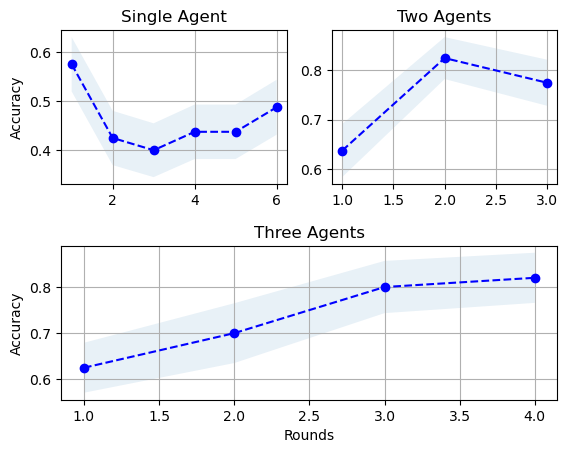

In [56]:
"""
Plotting GSM results
"""
data = gsmdata

# Create 2x2 sub plots
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, hspace=0.4, wspace = 0.2)
pl.figure()
ax = pl.subplot(gs[0, 0]) # row 0, col 0
ag1 = data[data.agents == 1][::-1]
pl.plot(range(1,len(ag1)+1),ag1.mean_accuracy.values, '--bo')
pl.fill_between(range(1,len(ag1)+1), ag1.mean_accuracy.values + ag1['std'], ag1.mean_accuracy.values - ag1['std'], alpha=0.1)
pl.grid()
pl.ylabel('Accuracy')
pl.title('Single Agent')

ax = pl.subplot(gs[0, 1]) # row 0, col 1
ag1 = data[data.agents == 2][::-1]
pl.plot(range(1,len(ag1)+1),ag1.mean_accuracy.values, '--bo')
pl.fill_between(range(1,len(ag1)+1), ag1.mean_accuracy.values + ag1['std'], ag1.mean_accuracy.values - ag1['std'], alpha=0.1)
pl.grid()
pl.title('Two Agents')

ax = pl.subplot(gs[1, :]) # row 1, span all columns
ag1 = data[data.agents == 3][::-1]
pl.plot(range(1,len(ag1)+1),ag1.mean_accuracy.values, '--bo')
pl.fill_between(range(1,len(ag1)+1), ag1.mean_accuracy.values + ag1['std'], ag1.mean_accuracy.values - ag1['std'], alpha=0.1)
pl.grid()
pl.xlabel('Rounds')
pl.ylabel('Accuracy')
pl.title('Three Agents')


In [52]:
ag1 = data[data.agents == 3][::-1]
ag1.mean_accuracy.values[::-1]

array([0.82 , 0.8  , 0.7  , 0.625])

In [77]:
mathdata

,agents,rounds,Nevals,mean_accuracy,std
0,7,2,30,0.933333,0.045542
1,7,1,30,0.966667,0.032773
2,6,3,30,0.866667,0.062063
3,6,2,30,0.900000,0.054772
4,6,1,30,0.933333,0.045542
5,5,2,30,0.966667,0.032773
6,5,1,30,0.966667,0.032773
7,3,2,30,0.900000,0.054772
8,5,3,30,0.833333,0.068041
9,3,5,30,0.566667,0.090472


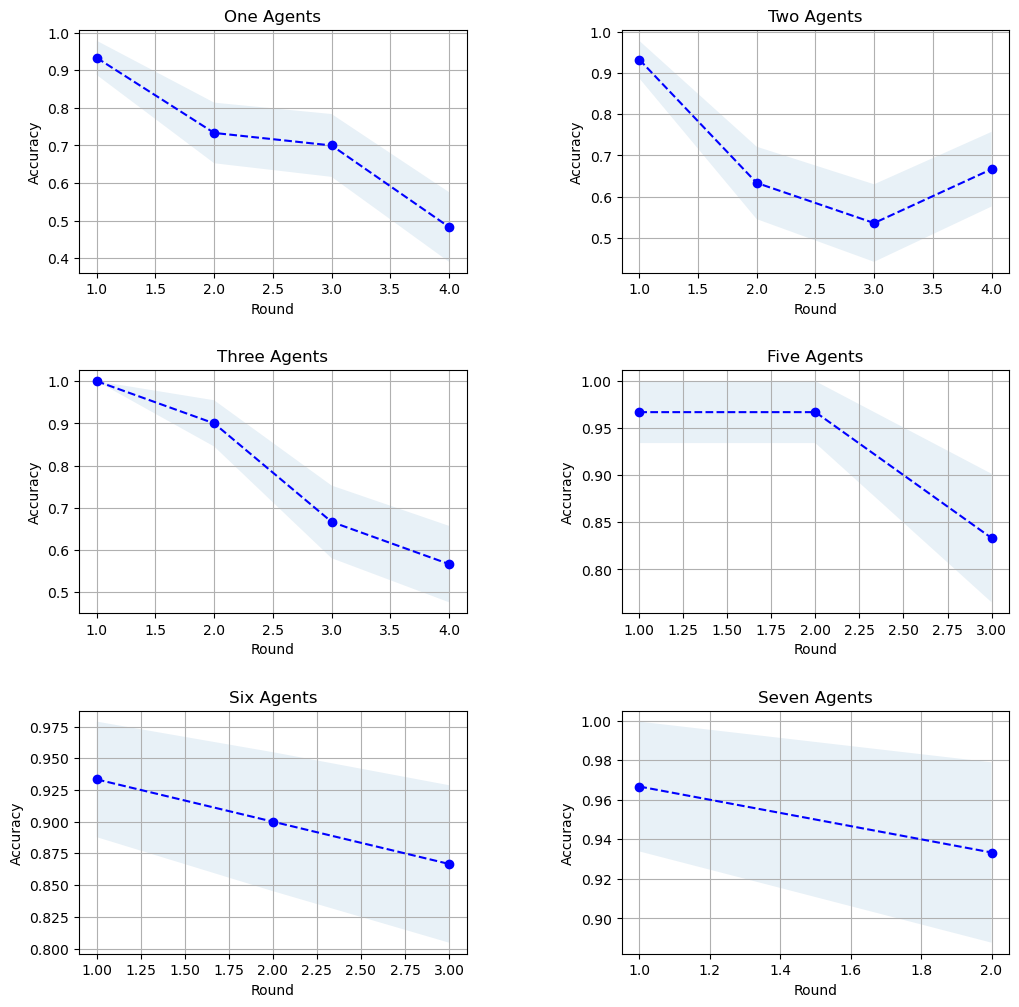

In [127]:
"""
Plotting Math results
"""
data = mathdata

# setting different parameters to adjust each grid
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12),
                       gridspec_kw={
                           'width_ratios': [3, 3],
                           'height_ratios': [3, 3, 3],
                       'wspace': 0.4,
                       'hspace': 0.4})

agents = [1,2,3,5,6,7]
d = {1 : 'One', 2 : 'Two', 3 : 'Three', 4 : 'Tour', 5 : 'Five',
          6 : 'Six', 7 : 'Seven'}
idx = 0 
for i in range(3):
    for j in range(2):  
        ag1 = data[data.agents == agents[idx]][::-1]
        ax[i][j].plot(range(1,len(ag1)+1),ag1.mean_accuracy.values, '--bo')
        ax[i][j].fill_between(range(1,len(ag1)+1), ag1.mean_accuracy.values + ag1['std'], ag1.mean_accuracy.values - ag1['std'], alpha=0.1)
        ax[i][j].grid() 
        ax[i][j].set_ylabel('Accuracy')
        ax[i][j].set_xlabel('Round')
        ax[i][j].set_title(f'{d[agents[idx]]} Agents')
        idx += 1




1 [1 3 5 7]
2 [1 3 5 7]
3 [1 2 3 5]
5 [1 2 3]
6 [1 2 3]
7 [1 2]


Text(0.5, 1.0, 'Accuracy vs. Rounds on Math Dataset')

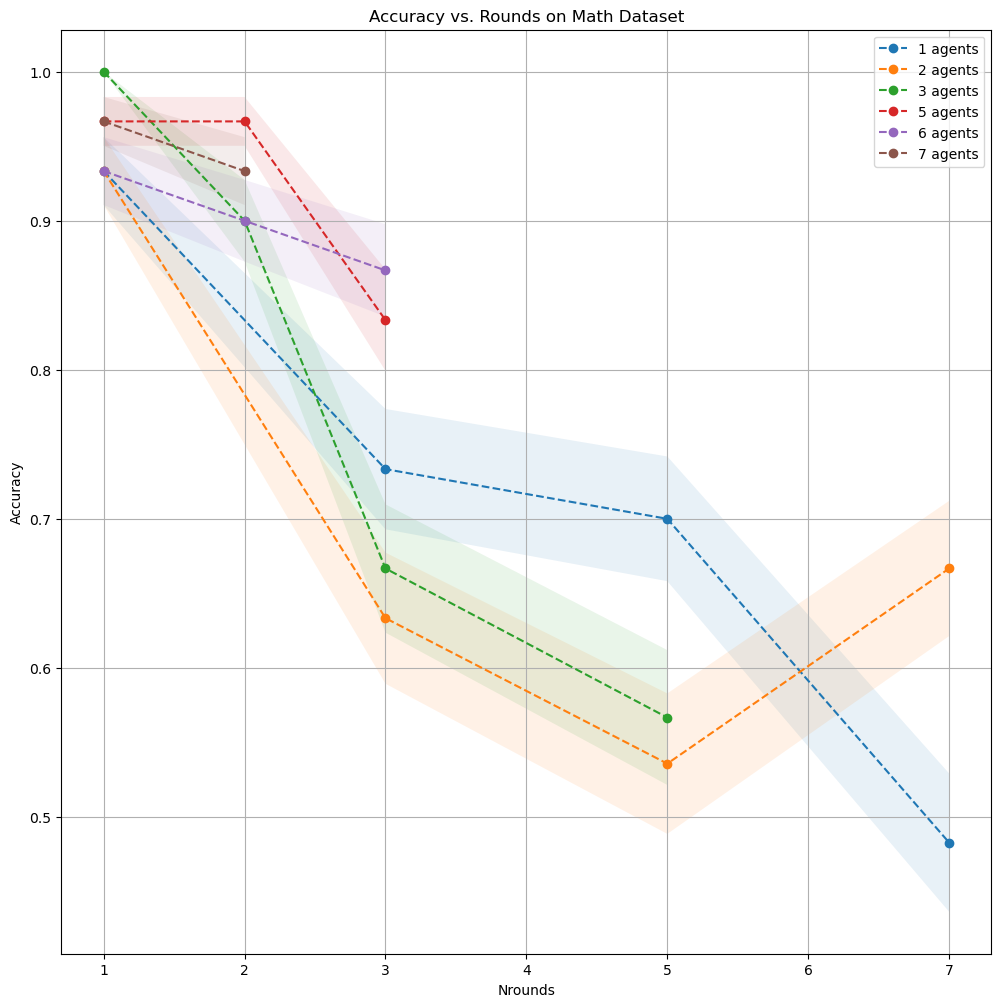

In [90]:
data = mathdata

# Create 2x2 sub plots
fig = plt.figure(figsize=(12,12))
agents = [1,2,3,5,6,7]
for ag in agents:
    d = data[data.agents == ag]
    rds = d.rounds.values[::-1]
    scores = d.mean_accuracy.values[::-1]
    stds = d['std'].values[::-1] / 2
    plt.plot(rds, scores, "--o", label=f"{ag} agents")
    plt.fill_between(rds, scores - stds, scores + stds, alpha=0.1)
    print(ag, rds)
plt.legend()
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("Nrounds")
plt.title("Accuracy vs. Rounds on Math Dataset")

2 [1 3 5 7]
3 [1 2 3 5]
5 [1 2 3 4]
6 [1 2 3]
7 [1 2]


Text(0.5, 1.0, 'Agreement vs. Rounds on Math Dataset')

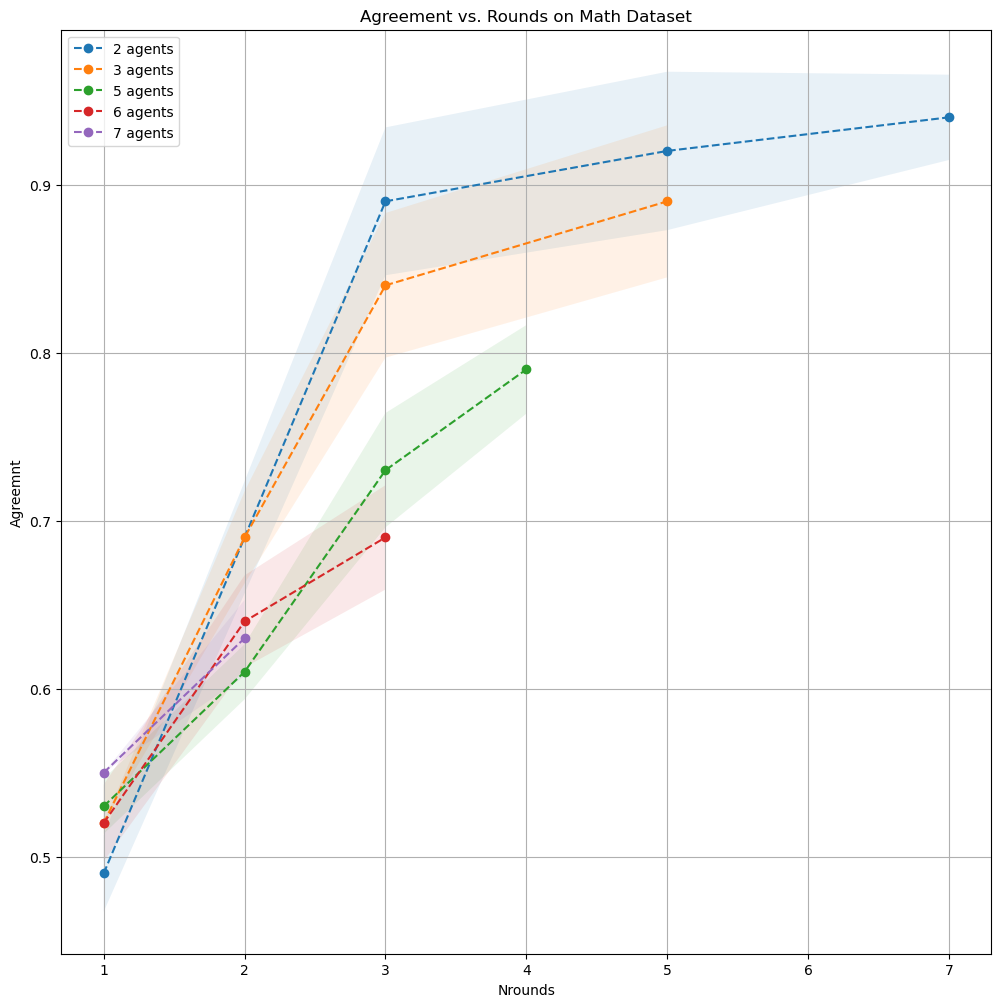

In [102]:
data = agreement_mathdata

# Create 2x2 sub plots
fig = plt.figure(figsize=(12,12))
agents = [2,3,5,6,7]
for ag in agents:
    d = data[data.agents == ag]
    rds = d.rounds.values[::-1]
    scores = d.agreement.values[::-1]
    scores =  list(map(float, scores))
    stds = d['std'].values[::-1] / 2
    plt.plot(rds, scores, "--o", label=f"{ag} agents")
    plt.fill_between(rds, scores - stds, scores + stds, alpha=0.1)
    print(ag, rds)
plt.legend()
plt.grid()
plt.ylabel("Agreemnt")
plt.xlabel("Nrounds")
plt.title("Agreement vs. Rounds on Math Dataset")